In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')

    plt.show()

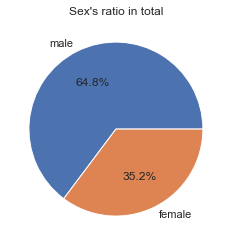

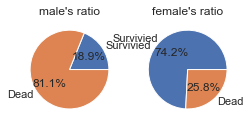

In [6]:
pie_chart('Sex')

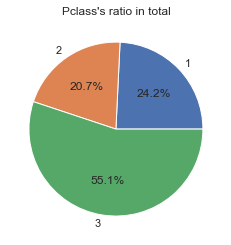

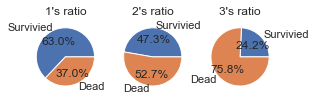

In [7]:
pie_chart('Pclass')

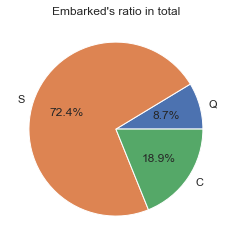

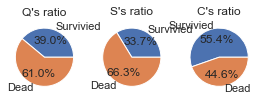

In [8]:
pie_chart('Embarked')

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

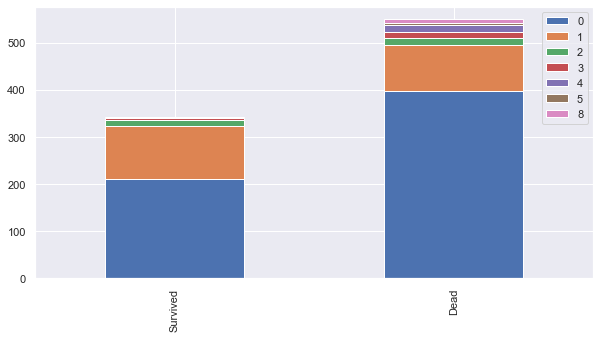

In [10]:
bar_chart("SibSp")

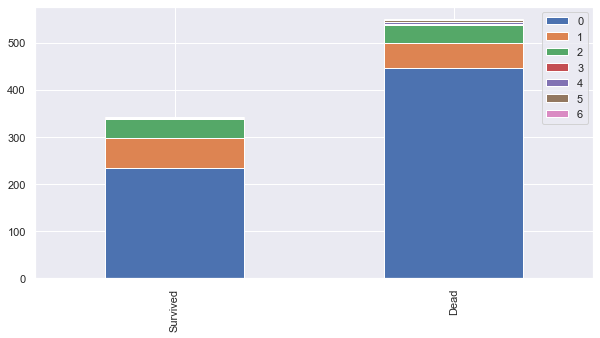

In [11]:
bar_chart("Parch")

In [12]:
train_and_test = [train, test]

## Name

In [13]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [16]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [17]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

## Sex

In [18]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

## Embark

In [19]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [20]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [22]:
embarked_mapping = {"S": 0, "C": 1.5, "Q": 3}
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.5,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,Mr


## Age

In [24]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [25]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.5,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0,Mr


In [26]:
pd.cut(train['Age'], 5 )

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [27]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 0.7
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 1.4
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 2.1
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 2.8
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  0.7: 'Young', 1.4: 'Middle', 2.1: 'Prime', 2.8: 'Old'} ).astype(str)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,Young,1,0,A/5 21171,7.2500,NaN,0.0,Mr
1,2,1,1,1,Middle,1,0,PC 17599,71.2833,C85,1.5,Mrs
2,3,1,3,1,Young,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss
3,4,1,1,1,Middle,1,0,113803,53.1000,C123,0.0,Mrs
4,5,0,3,0,Middle,0,0,373450,8.0500,NaN,0.0,Mr


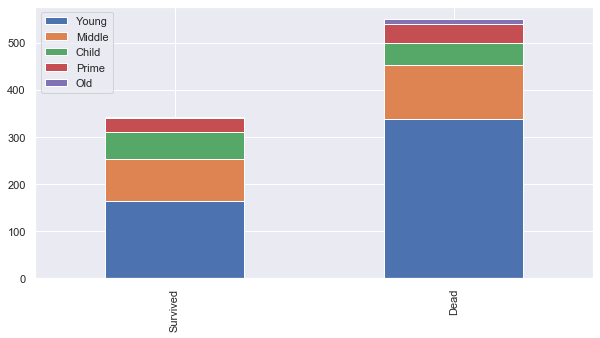

In [29]:
bar_chart('Age')

## Fare

In [30]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,Young,1,0,A/5 21171,7.2500,NaN,0.0,Mr
1,2,1,1,1,Middle,1,0,PC 17599,71.2833,C85,1.5,Mrs
2,3,1,3,1,Young,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss
3,4,1,1,1,Middle,1,0,113803,53.1000,C123,0.0,Mrs
4,5,0,3,0,Middle,0,0,373450,8.0500,NaN,0.0,Mr


In [31]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 0.7
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 1.4
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 2.1
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 2.8

## SibSp & Parch Feature

In [32]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

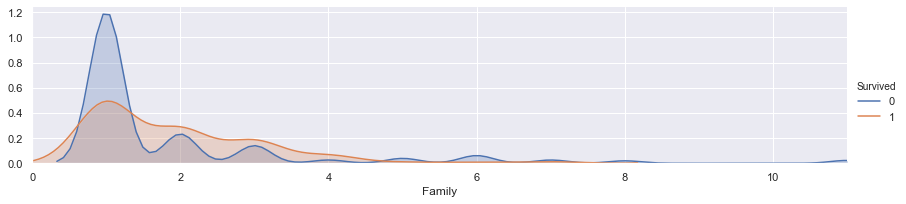

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Family',shade= True)
facet.set(xlim=(0, train['Family'].max()))
facet.add_legend()
plt.xlim(0)

In [34]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_and_test:
    dataset['Family'] = dataset['Family'].map(family_mapping)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,0,Young,1,0,A/5 21171,0.0,NaN,0.0,Mr,0.4
1,2,1,1,1,Middle,1,0,PC 17599,2.8,C85,1.5,Mrs,0.4
2,3,1,3,1,Young,0,0,STON/O2. 3101282,0.7,NaN,0.0,Miss,0.0
3,4,1,1,1,Middle,1,0,113803,2.8,C123,0.0,Mrs,0.4
4,5,0,3,0,Middle,0,0,373450,0.7,NaN,0.0,Mr,0.0


## Cabin

In [36]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
              ..
E58            1
D6             1
B41            1
D56            1
A10            1
Name: Cabin, Length: 147, dtype: int64

In [37]:
for dataset in train_and_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

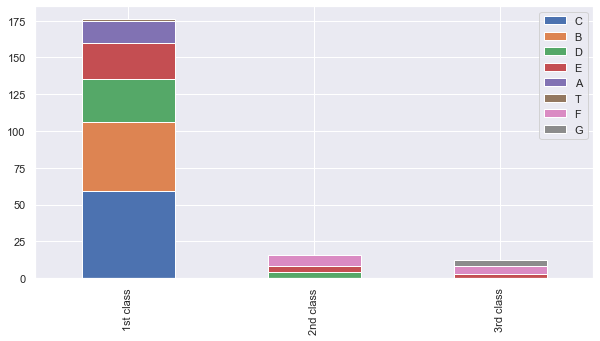

In [38]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [39]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_and_test:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [40]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,0,Young,1,0,A/5 21171,0.0,2.0,0.0,Mr,0.4
1,2,1,1,1,Middle,1,0,PC 17599,2.8,0.8,1.5,Mrs,0.4
2,3,1,3,1,Young,0,0,STON/O2. 3101282,0.7,2.0,0.0,Miss,0.0
3,4,1,1,1,Middle,1,0,113803,2.8,0.8,0.0,Mrs,0.4
4,5,0,3,0,Middle,0,0,373450,0.7,2.0,0.0,Mr,0.0


In [42]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass  Sex     Age  Fare  Cabin  Embarked Title  Family
0         0       3    0   Young   0.0    2.0       0.0    Mr     0.4
1         1       1    1  Middle   2.8    0.8       1.5   Mrs     0.4
2         1       3    1   Young   0.7    2.0       0.0  Miss     0.0
3         1       1    1  Middle   2.8    0.8       0.0   Mrs     0.4
4         0       3    0  Middle   0.7    2.0       0.0    Mr     0.0
   PassengerId  Pclass  Sex     Age  Fare  Cabin  Embarked Title  Family
0          892       3    0  Middle   0.0    2.0       3.0    Mr     0.0
1          893       3    1  Middle   0.0    2.0       0.0   Mrs     0.4
2          894       2    0   Prime   0.7    2.0       3.0    Mr     0.0
3          895       3    0   Young   0.7    2.0       0.0    Mr     0.0
4          896       3    1   Young   1.4    2.0       0.0   Mrs     0.8


In [43]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

In [44]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle

In [45]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [46]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [47]:
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))

Accuracy :  90.57 %
